In [1]:
import matplotlib
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv('./Data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Shape
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains

In [5]:
train_data.shape

(891, 12)

In [6]:
#Data Info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Missing Value.
From above information it seems that there are some missing values are available. 
Heatmap will help better to visualize better what feature's are miising the most information

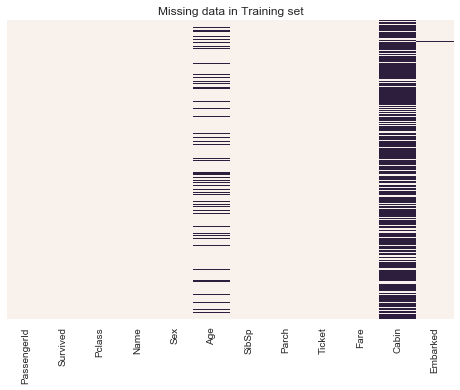

In [7]:
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False)
plt.title('Missing data in Training set')

The 'Age' variable is missing roughly 20% of its data. This proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values). However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0'.

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However, we can be smarter about this and check the average age by passenger class.

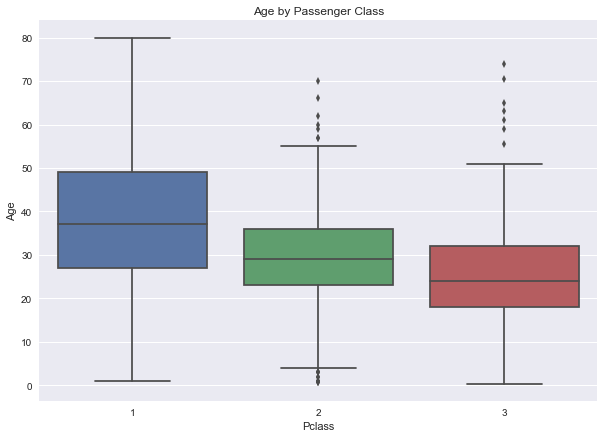

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data=train_data).set_title("Age by Passenger Class")

From above boxplot we can visualize that the higher class passenger are tend to older then the lower class passanger.
So it can help in fill the missing value with respect to Passanger Class

In [9]:
#Average Value by PClass
train_data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [10]:
#Assigning Age to missing value
def assign_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    

#Apply this function on Age column.
train_data['Age'] = train_data[['Age', 'Pclass']].apply(assign_age, axis=1)

In [11]:
#Now check the Age column.
train_data.Age.isnull().any()

False

The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [12]:
#Remove Cabin Feature
train_data.drop('Cabin', axis=1, inplace=True)

## Data Types
Next, I'll need to confirm that the variables are being assigned the correct data type to allow for easier analysis later on.

### Categoraical Features

In [13]:
# Data types
print(train_data.info())

# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(train_data.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB
None


Non-Null Objects to Be Converted to Category
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


Name and Ticket column can be removed from the dataset because it hase not effect on passanger is survive or not.

The remaining non-null objects, Sex and Embarked, will need to be specified as categories for better analysis results downstream.

In [14]:
train_data.drop(['Name', 'Ticket'], axis=1,inplace=True)

object = ['Sex','Embarked']

for colname in object:
    train_data[colname] = train_data[colname].astype('category')
    

In [15]:
#let's check
train_data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

## Numerical Features.

In [16]:
#Numeric data summary
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.265062,13.212184,0.42,22.0000,26.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


PassangerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival. The remaining variables are the correct data type.

In [17]:
train_data.drop('PassengerId', axis=1, inplace=True)

# Objective 1: Exploratory Data Analysis

## Target Variable

**Survived** is our target as that is the dependent variable we are trying to predict.

In [18]:
#Survival Count
print('Target Variable')
train_data.groupby('Survived').Survived.count()

Target Variable


Survived
0    549
1    342
Name: Survived, dtype: int64

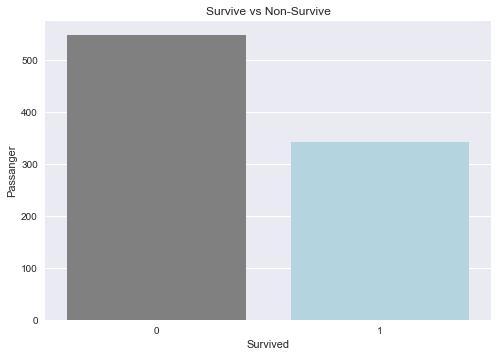

In [19]:
# Target variable CountPlot
sns.set_style('darkgrid')
sns.countplot(train_data['Survived'], palette=['gray','lightblue'])
plt.title('Survive vs Non-Survive')
plt.ylabel('Passanger')
#plt.xlabel('Survival')

From this plot we can describe that majority of passanger did not survive.

In [20]:
# Identify numeric features
print('Continuous Variables')
print(train_data[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(train_data.groupby('Pclass').Pclass.count())
print('--'*40)
print(train_data.groupby('SibSp').SibSp.count())
print('--'*40)
print(train_data.groupby('Parch').Parch.count())

Continuous Variables
      count       mean        std   min      25%      50%   75%       max
Age   891.0  29.265062  13.212184  0.42  22.0000  26.0000  37.0   80.0000
Fare  891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
--------------------------------------------------------------------------------
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
--------------------------------------------------------------------------------
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


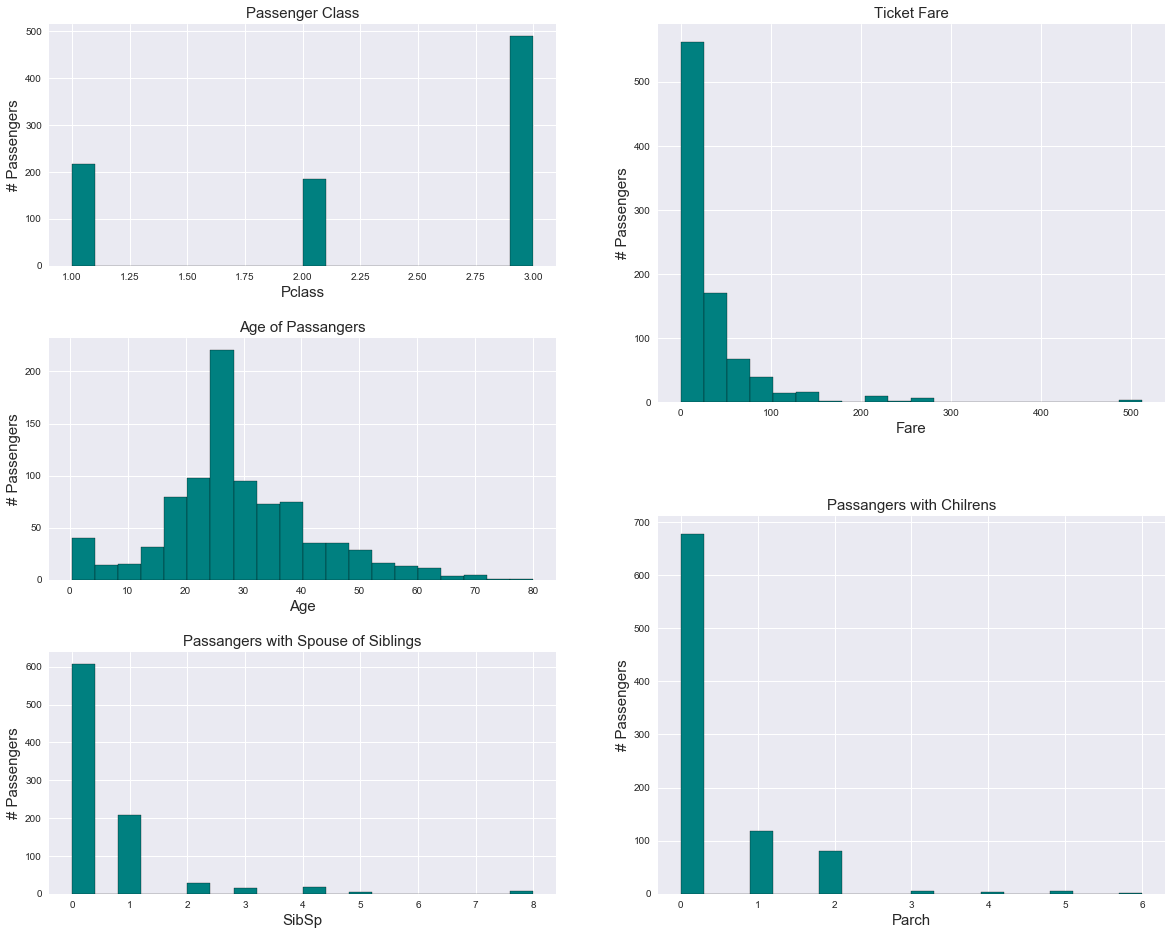

In [21]:
#Subplot of Numeric Feature.
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,16))
fig.subplots_adjust(hspace=0.30)

ax1= fig.add_subplot(321)
ax1.hist(train_data['Pclass'], bins = 20, edgecolor='black', color = 'teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(train_data['Age'], bins = 20, edgecolor='black', color = 'teal')
ax2.set_xlabel('Age', fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passangers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(train_data['SibSp'], bins = 20, edgecolor='black', color = 'teal')
ax3.set_xlabel('SibSp', fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passangers with Spouse of Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(train_data['Fare'], bins = 20, edgecolor='black', color = 'teal')
ax4.set_xlabel('Fare', fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Ticket Fare',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(train_data['Parch'], bins = 20, edgecolor='black', color = 'teal')
ax5.set_xlabel('Parch', fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Passangers with Chilrens',fontsize = 15)


## Numeric Features Insights
- The majority of passengers aboard were third class
- Most were single travelors with no spouses or children
- Passenger age appears to be bi-modal, with a small peak around 5 years of age and a larger peak around 25 years old. This is an indication that the passenger age on board is distributed towards younger individuals with the median age being 26.
- The bulk of fare prices are under 25dollar with a median fare of 14dollar. However, the data is skewed to the right with outliers up to $500.

## Target vs Numeric Features
## Passenger Class

Passenger Class Summary


Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


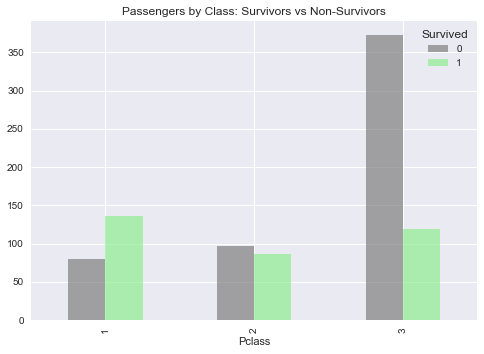

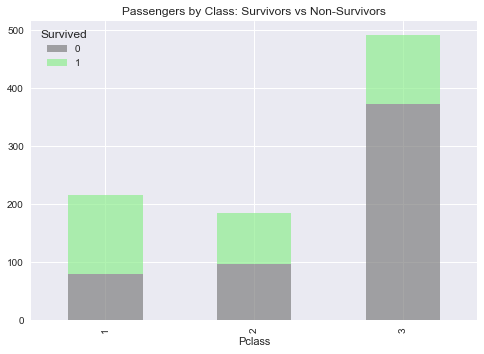

In [22]:
# Passenger class summary
print('Passenger Class Summary')

print('\n')
print(train_data.groupby(['Pclass','Survived']).Pclass.count().unstack())

# Passanger Class visulization
pclass = train_data.groupby(['Pclass','Survived']).Pclass.count().unstack()
pclass.plot( kind = 'bar', title = 'Passengers by Class: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)

#Same graph with stacked graph
pclass.plot( kind = 'bar',stacked = True, title = 'Passengers by Class: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)



## Passenger Class Insight
- The majority of first-class passengers survived.
- Most of the passengers in second and third class did not survive the sinking.

## Solo Passagner Analysis

Passanger with Siblings or Spouse


Survived      0      1
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


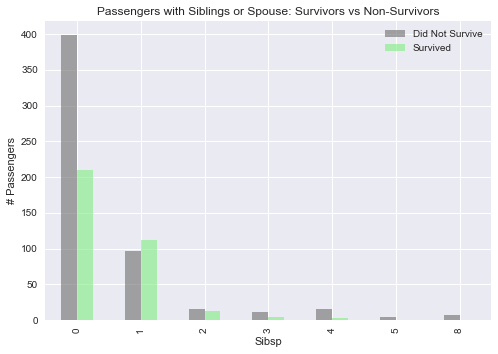

In [23]:
print('Passanger with Siblings or Spouse')
print('\n')
print(train_data.groupby(['SibSp', 'Survived']).SibSp.count().unstack())

#Visually Representation
sibsp = train_data.groupby(['SibSp', 'Survived']).SibSp.count().unstack()
p2 = sibsp.plot(kind = 'bar', color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Passengers with Siblings or Spouse: Survivors vs Non-Survivors')
p2.set_xlabel('Sibsp')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])

## Passanger with Childern

Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


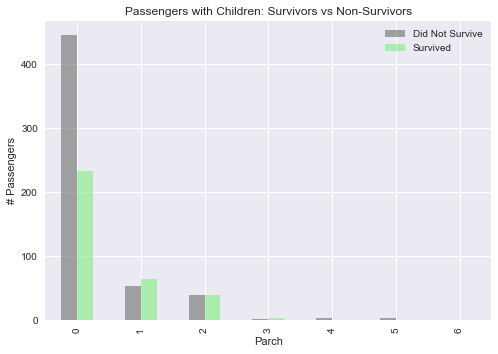

In [24]:
print(train_data.groupby(['Parch','Survived']).Parch.count().unstack())

parch = train_data.groupby(['Parch','Survived']).Parch.count().unstack()
p3 = parch.plot(kind = 'bar',
                   color = ['grey','lightgreen'], alpha = .70)
p3.set_title('Passengers with Children: Survivors vs Non-Survivors')
p3.set_xlabel('Parch')
p3.set_ylabel('# Passengers')
p3.legend(['Did Not Survive','Survived'])
p3.grid(axis=None)

Passengers with Children Insight
- The majority of passengers aboard did not have children
- Most passengers without children did not survive.
- Passengers with one or two children survived half of the time

## Ticket Fair and Age of Passangers

Statistical Summary of Age and Passanger


Did not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.787796  12.720646  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survive
      count       mean        std   min     25%   50%    75%       max
Age   342.0  28.425936  13.943188  0.42  21.000  27.0  36.75   80.0000
Fare  342.0  48.395408  66.596998  0.00  12.475  26.0  57.00  512.3292


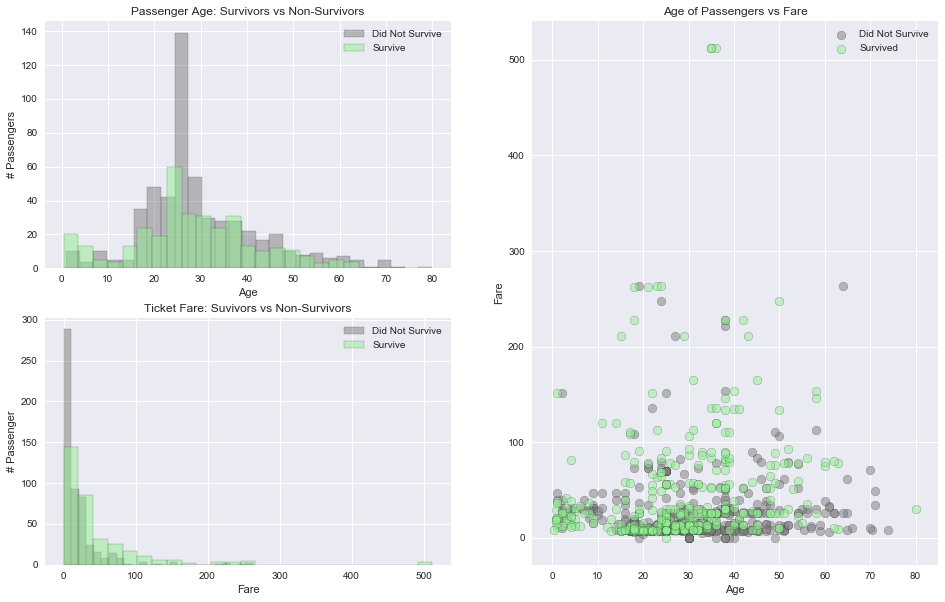

In [25]:
print('Statistical Summary of Age and Passanger')
print('\n')
print('Did not Survive')
no_survive = train_data[train_data['Survived'] == 0][['Age','Fare']].describe().transpose()
print(no_survive)
print('--'*40)
survive = train_data[train_data['Survived'] == 1][['Age','Fare']].describe().transpose()
print('Survive')
print(survive)


#Visulize Representation
sns.set_style('darkgrid')
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins=25, label='Did Not Survive'
        ,alpha = 0.5, edgecolor='black', color='gray')
ax1.hist(train_data[train_data['Survived'] ==1].Age, bins=25, label='Survive'
        ,alpha = 0.5, edgecolor='black', color='lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 0)

ax2 = fig.add_subplot(223)
ax2.hist(train_data[train_data['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50
         , edgecolor ='black', color = 'grey')
ax2.hist(train_data[train_data['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50
         , edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 0)

ax3 = fig.add_subplot(122)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()


## Numeric Features Insight
- The majority of passengers under 10 years of age survived.
- Most people that paid over $100 for their ticket survived.
- There were a fewer number of people that survived over the age of 40.

## Categorical Features

In [26]:
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

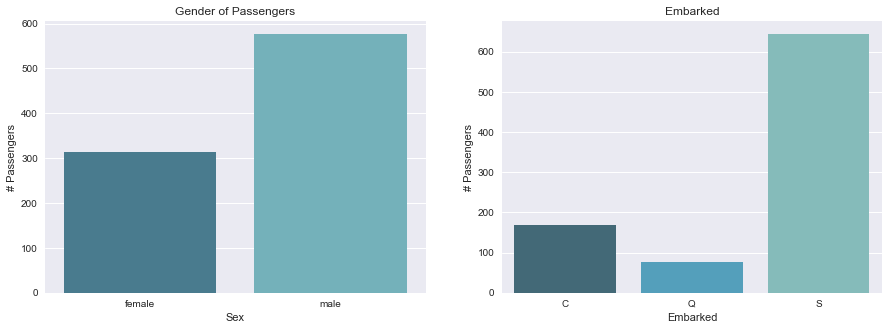

In [27]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (15,5))

# Plot [0]
sns.countplot(x = 'Sex', data = train_data, palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('# Passengers')
axes[0].set_title('Gender of Passengers')

# Plot [1]
sns.countplot(x = 'Embarked', data = train_data, palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('# Passengers')
axes[1].set_title('Embarked')

## Categorical Features Insight
- Passengers were primarily male
- Most passengers embarked from Southhampton

## Target Vs. Categorical Value

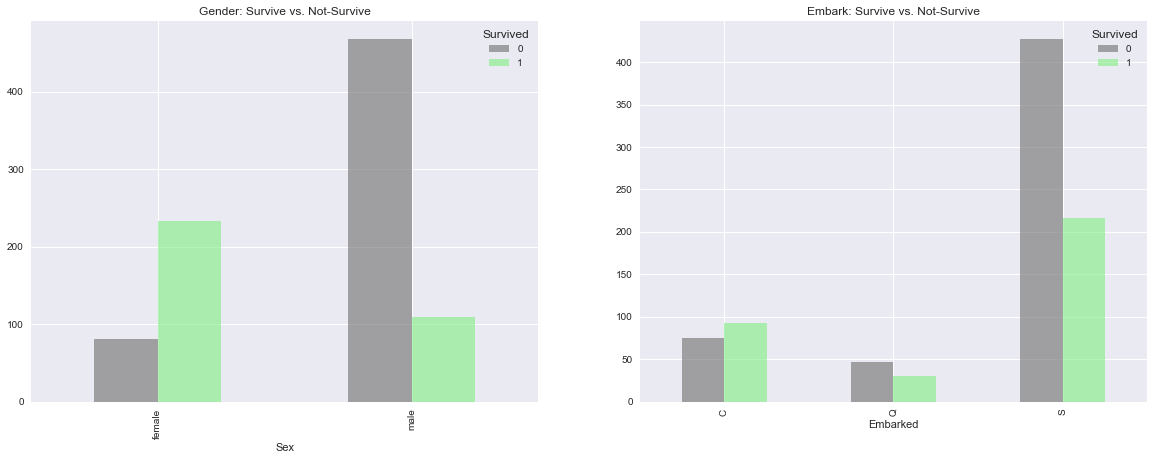

In [28]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))
# Subplot for gender vs. survive or not
gender = train_data.groupby(['Sex','Survived']).Sex.count().unstack()
gender
p1 = gender.plot(kind = 'bar', title='Gender: Survive vs. Not-Survive', color=['gray','lightgreen']
                ,alpha = 0.7, ax=axes[0])

# Subplot for Embarked vs. survive or not
embark = train_data.groupby(['Embarked', 'Survived']).Embarked.count().unstack()
p2 = embark.plot(kind = 'bar', title='Embark: Survive vs. Not-Survive', color=['gray','lightgreen']
                ,alpha = 0.7, ax=axes[1])

## Categorical Variable Insights
- Most of the female passengers on board survived

## GETTING MODEL READY
Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [29]:
train_data.shape

(891, 8)

In [30]:
# Identify categorical features
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [31]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [32]:
# Add new dummy columns to data frame
train_data = pd.concat([train_data, sex, embarked], axis = 1)
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0


In [33]:
# Drop unecessary columns
train_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',train_data.shape)

# Confirm changes
train_data.head()

train_data shape (891, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Now the train data is perfect for a machine learning algorithm:
- all the data is numeric
- everything is concatenated together

# OBJECTIVE 2: MACHINE LEARNING
Next, I will feed these features into various classification algorithms to determine the best performance using a 
simple framework: **Split, Fit, Predict, Score** It.

In [66]:
# Split data to be used in model
x = train_data.drop('Survived', axis=1) # grabs everything else but 'Survived'

# Create target variable
y = train_data['Survived'] # y is the column we're trying to predict

In [67]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

## Logistic Regression

In [35]:
#Fit
# Import model
from sklearn.linear_model import LogisticRegression

#Create instance of model
lreg = LogisticRegression()

#pass the training data into model
lreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred_lreg = lreg.predict(x_test)

In [37]:
#Score it
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [38]:
#Confusion matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

#Classification report
print('Classification report')
print(classification_report(y_test,y_pred_lreg))
print('--'*40)

#Accuracy
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg)*100,2)
print('Accuracy' ,logreg_accuracy, '%')

Logistic Regression


Confusion Matrix
[[88 11]
 [25 55]]
--------------------------------------------------------------------------------
Classification report
             precision    recall  f1-score   support

          0       0.78      0.89      0.83        99
          1       0.83      0.69      0.75        80

avg / total       0.80      0.80      0.80       179

--------------------------------------------------------------------------------
Accuracy 79.89 %


# Interpretation

## Accuracy
- 80% of the model's predictions are correct.
## Precision
- Precision is measure of how precise the model's predictions are. When the model predicts a passenger survived, that person actually did survive 81% of the time.
## Recall (Sensitivity)
- If there a passenger that survived is present in the test set, the model is able to identify (recall) it 81% of the time.
## F1 Score
- F1 Score is the best of both worlds as it is a weighted average of precision and recall. An F1 Score of 80% means that 80% of the time:
- when the model predicts someone survived, you can be confident that person actually did survive and it is not a false alarm.
- when there is a actual surivior in the dataset, the model is able to detect it In classification problems where there are more than two labels that apply, accuracy is less intuitive and the F1 Score is a better measure of a model's performance.

# K-NEAREST NEIGHBORS¶


K-Nearest Neighbors (KNN) is used to classify new data points based on ‘distance’ to known data on a scatter plot with a two step process:
1. Find K nearest neighbors based on your distance metric
2. Let them all vote on the classification

KNN is different from the previous classifiers in that it requires variables to be standardized before the model is trained. This is because the KNN classifier predicts the class of a given test observation by identifying the observations nearest to it. Thus, the scale of the variables matters.

Any variables that are on a large scale will have a much larger effect on the distance between the observations (and hence, on the KNN classifier) than variables that are on a small scale. Therefore, everything should be standardized to the same scale when using k-nearest neighbors to classify.

In [39]:
#Standarize the variables

#Import StandardScalar
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#Fit scalar object to the feature columns.
scalar.fit(train_data.drop('Survived', axis=1))   #All the feature but not target variable

scaled_features = scalar.transform(train_data.drop('Survived', axis = 1)) # performs the standardization by centering and scaling

scaled_features

array([[ 0.82737724, -0.55018473,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.66149881,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.24726385, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ..., 
       [ 0.82737724, -0.32299407,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.24726385, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.20711748, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [40]:
train_data.columns[:-1]

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q'], dtype='object')

In [41]:
# Use scaled features variable to re-create a features dataframe
df_feat = pd.DataFrame(scaled_features, columns=train_data.columns[:-1])
df_feat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q
0,0.827377,-0.550185,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.661499,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.247264,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.434308,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,0.434308,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


In [42]:
#Split
#Import 
from sklearn.model_selection import train_test_split

X = df_feat

y=train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 111)

In [43]:
#Fit
#Import Model

from sklearn.neighbors import KNeighborsClassifier

#Create instance of Model
knn = KNeighborsClassifier(n_neighbors=1)

#Fit Training Data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
#Predict
y_pred_knn = knn.predict(X_test)

In [45]:
# Score It
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')
# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_knn))
print('--'*40)

#Classification test
print('Classification Test')
print(classification_report(y_test,y_pred_knn))
print('--'*40)

#Accuracy
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,1)
print('Accuracy',knn_accuracy,'%')

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[95 18]
 [22 44]]
--------------------------------------------------------------------------------
Classification Test
             precision    recall  f1-score   support

          0       0.81      0.84      0.83       113
          1       0.71      0.67      0.69        66

avg / total       0.77      0.78      0.77       179

--------------------------------------------------------------------------------
Accuracy 77.7 %


## KNN Parameter Tuning
With a precision of 72.5%, the model's performance is accepatable using k = 1, but could be improved by choosing a better k value.

The best way to identify the optimal k value is with the 'Elbow' method, which interates many models using different k values and plots their error rates. The k with the lowest error rate is the optimal value we want to use.


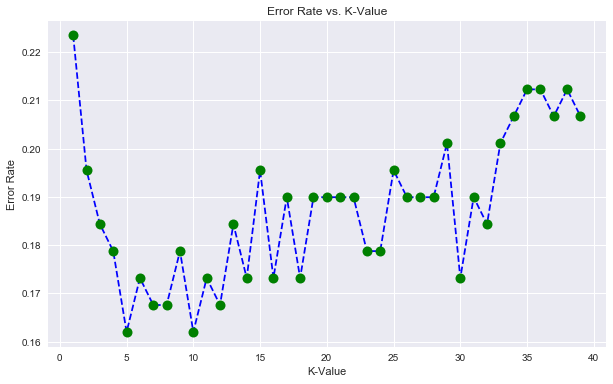

In [46]:
#Function 
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#Plot Error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle ='--'
        ,marker = 'o', markerfacecolor = 'green', markersize = 10)
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K-Value')

At k=10, the error rate is at it's lowest, making 13 the optimal value for k. I will retrain and test the model accordingly.

In [47]:
# Fit new KNN
# Create model object
knn = KNeighborsClassifier(n_neighbors = 10)

# Fit new KNN on training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [48]:
# Predict new KNN
y_pred_knn_op = knn.predict(X_test)

In [114]:
# Score It
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')
# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_knn_op))
print('--'*40)

#Classification test
print('Classification Test')
print(classification_report(y_test,y_pred_knn_op))
print('--'*40)

#Accuracy
knn_accuracy_tuning = round(accuracy_score(y_test, y_pred_knn_op)*100,1)
print('Accuracy',knn_accuracy_tuning,'%')

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[106   7]
 [ 22  44]]
--------------------------------------------------------------------------------
Classification Test
             precision    recall  f1-score   support

          0       0.83      0.94      0.88       113
          1       0.86      0.67      0.75        66

avg / total       0.84      0.84      0.83       179

--------------------------------------------------------------------------------
Accuracy 83.8 %


By using the elbow method to find the optimal k value, the model's accuracy and precision improved to 83% and f1-score jumped to 82%.

# Linear Support Vector Classifier

In [71]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

x = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

In [72]:
# Fit the model on training data
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
# Predict
y_pred_svc = svc.predict(x_test)

In [74]:
# Score It
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[86 13]
 [45 35]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.66      0.87      0.75        99
          1       0.73      0.44      0.55        80

avg / total       0.69      0.68      0.66       179

--------------------------------------------------------------------------------
Accuracy 67.6 %


### SVC Parameter Tuning with GridSearch
The SVC did not perform as well as the Logistic Regression, indicating that this model's parameters need to be tuned for better performance. Finding the right parameters (spefically, what C or gamma values to use) is a tricky task. But luckily, we just try different combinations and see what works best. This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV (CV stands for cross-validation).

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.
#### Parameters
##### C
controls the cost of missclassification on the training data.
High C: low bias (because you penalized the cost of misclassification alot) and high variance.

Low C: high bias (not penalizing the cost of missclassficiation as much) and low variance.
##### Gamma
Low gamma: means Gaussian with a large variance

High gamma: high bias and low variance

You would treat the GridSearchCV object just like you would a normal model.

In [75]:
#Create parameter grid

param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

In [77]:
#Import
from sklearn.model_selection import GridSearchCV

#Instance gridsearch object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)#verbose is the text output describing the process

In [119]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [78]:
#Fit training data
grid.fit(x_train, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    4.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

'Fitting' here is a bit more involved then usual:
- First, it runs the same loop with cross-validation to find the best parameter combination.
- Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation) to build a single new model using the best parameter setting.

We can then inspect the best parameters found by GridSearchCV in the bestparams attribute, and the best estimator in the best estimator attribute.

In [80]:
# Call best parameter attribute
print(grid.best_params_)

#Call best_estimator attribute
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [81]:
#Now predict using best predictor
y_pred_grid = grid.predict(x_test)

In [82]:
# Score It
# Confusion Matrix
print('SVC with GridSearchCV')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_grid))
print('--'*40)
# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_grid))
By adjusting the parameters with GridSearchCV, the model performed much better in precision, recall, and accuracy than the original SVC (an increase of 8%).
# Accuracy
print('--'*40)
svc_grid_accuracy = round(accuracy_score(y_test, y_pred_grid)*100,2)
print('Accuracy',svc_grid_accuracy,'%')

SVC with GridSearchCV


Confusion Matrix
[[87 12]
 [27 53]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.76      0.88      0.82        99
          1       0.82      0.66      0.73        80

avg / total       0.79      0.78      0.78       179

--------------------------------------------------------------------------------
Accuracy 78.21 %


By adjusting the parameters with GridSearchCV, the model performed much better in precision, recall, and accuracy than the original SVC (an increase of 11%).

# Decision Tree

In [84]:
x = train_data.drop('Survived', axis=1)
y = train_data['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=111)

In [85]:
#Import the model
from sklearn.tree import DecisionTreeClassifier

#Create instance of model
dtree = DecisionTreeClassifier()

In [86]:
#Fit the training data
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [89]:
#Predict 
y_pred_dtree = dtree.predict(x_test)

In [92]:
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)

print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[92 21]
 [21 45]]
--------------------------------------------------------------------------------
Classification Report              precision    recall  f1-score   support

          0       0.81      0.81      0.81       113
          1       0.68      0.68      0.68        66

avg / total       0.77      0.77      0.77       179

--------------------------------------------------------------------------------
Accuracy 76.54 %


In [98]:
param_grid2 = {'max_depth' : np.arange(1, len(x_train)-1, 2), 'min_samples_split' : range(10,500,20)}

In [99]:
grid2 = GridSearchCV(DecisionTreeClassifier(), param_grid2, refit=True, verbose=1)

In [100]:
grid2.fit(x_train, y_train)

Fitting 3 folds for each of 8875 candidates, totalling 26625 fits


[Parallel(n_jobs=1)]: Done 26625 out of 26625 | elapsed:  3.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([  1,   3, ..., 707, 709]), 'min_samples_split': range(10, 500, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [101]:
grid2.best_params_

{'max_depth': 3, 'min_samples_split': 10}

In [103]:
pred_grid_dtree = grid2.predict(x_test)

In [104]:
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[92 21]
 [21 45]]
--------------------------------------------------------------------------------
Classification Report              precision    recall  f1-score   support

          0       0.81      0.81      0.81       113
          1       0.68      0.68      0.68        66

avg / total       0.77      0.77      0.77       179

--------------------------------------------------------------------------------
Accuracy 76.54 %


With an accuracy of just 76%, the decision tree performed much worse than the logistic regression. In fact, the primary weakness of a single decision tree is that it doesn't tend to have the best predictive accuracy in general. This is partially due to the high variance - different splits in the training data can lead to very different trees. To improve performance, we can create an ensemble of decision trees with bootstrapped samples of the training set (sampling from the training set with replacement) and using random splits on the features.

# Random Forest

In [108]:
x = train_data.drop('Survived', axis=1)
y = train_data['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=111)

In [107]:
# Import model object
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

In [109]:
#Fit the model with training data
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [110]:
y_pred_rfc = rfc.predict(x_test)

In [111]:
# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[96 17]
 [15 51]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.86      0.85      0.86       113
          1       0.75      0.77      0.76        66

avg / total       0.82      0.82      0.82       179

--------------------------------------------------------------------------------
Accuracy 82.12 %


In [116]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Linear SVC','K-Nearest Neighbors', 
               'Decision Tree', 'Random Forest']
    ,'Score' : [logreg_accuracy, svc_grid_accuracy,knn_accuracy_tuning, dtree_accuracy, rf_accuracy]
})
models

,Model,Score
0,Logistic Regression,79.89
1,Linear SVC,78.21
2,K-Nearest Neighbors,83.80
3,Decision Tree,76.54
4,Random Forest,82.12


# AND THE WINNER IS...
K-Nearest Neighbors with K = 10 with the highest overall performance in accuracy, recall, and precision (~ 83% across the board). The other classification models also performed well, but were a few percentage points lower in their evaluation metrics. Additional parameter tuning could improve each model's performance even more, but this initial analysis proved to be a good starting point.

# OBJECTIVE 3: CONTEST SUBMISSION
Now that I've determined the best performing models for this data problem, I will apply **Logistic Regression** to the test data 

But before I can use the test data, I need to perform the same pre-processing procedures used on the training data above. Again, I'll need to address missing data and encoding categorical variables to the correct data type.

## TEST DATA PRE-PROCESSING

In [50]:
#load test data
test_data = pd.read_csv(r'./Data/test.csv')

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


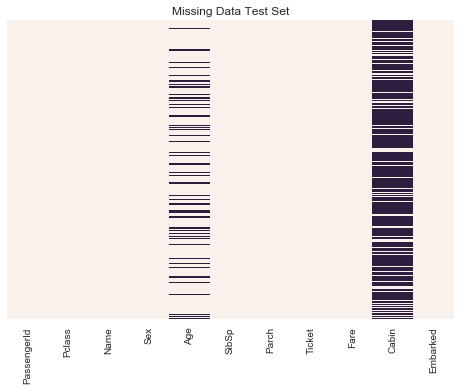

In [52]:
#Heatmap
sns.heatmap(test_data.isnull(),yticklabels=False, cbar=False)
plt.title('Missing Data Test Set')


In [53]:
#Missing data
test_data['Age'] = test_data[['Age','Pclass']].apply(assign_age, axis=1)

In [54]:
# Drop cabin feature
test_data = test_data.drop(['Cabin'], axis = 1)

In [55]:
# Impute Fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# Confirm changes
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [56]:
# Remove unecessary columns
test_data = test_data.drop(['Name','Ticket'],axis = 1)
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [57]:
# Identify categorical variables
test_data.select_dtypes(['object']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [58]:
# Convert categorical variables into 'dummy' or indicator variables
testsex = pd.get_dummies(test_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
testembarked = pd.get_dummies(test_data['Embarked'], drop_first = True)

# Add new dummy columns to data frame
test_data = pd.concat([test_data, testsex, testembarked], axis = 1)

# Drop unecessary columns
test_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [59]:
# Test data shape
print(test_data.shape)

# Confirm changes
test_data.head()

(418, 9)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [60]:
# Split
x_train2 = train_data.drop("Survived", axis=1)
y_train2 = train_data["Survived"]
x_test2  = test_data.drop("PassengerId", axis=1).copy()
print('x_train shape', x_train2.shape)
print('y_train shape',y_train2.shape)
print('x_test shape', x_test2.shape)

x_train shape (891, 8)
y_train shape (891,)
x_test shape (418, 8)


In [61]:
#Fit into logistic regression
log_reg = LogisticRegression()

#Fit new logisticregreesion on training data
log_reg.fit(x_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
#Predict
y_pred = log_reg.predict(x_test2)

In [63]:
# Create contest submission
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv('./Data/LogisticSubmission.csv', index=False)

In [117]:
#KNN Model Submission
knn_test = KNeighborsClassifier(n_neighbors=10)

In [118]:
knn_test.fit(x_train2, y_train2)
y_pred_knn_test = knn_test.predict(x_test2)

# Create contest submission
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_knn_test
    })

submission.to_csv('./Data/KNNSubmission.csv', index=False)

In [120]:
#Liniear Support Model Classification submission
svc_test = SVC(C=1000, gamma=0.0001, kernel='rbf')
svc_test.fit(x_train2, y_train2)
y_pred_svc_test = svc_test.predict(x_test2)

# Create contest submission
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_svc_test
    })

submission.to_csv('./Data/LSVCSubmission.csv', index=False)

In [121]:
#Decision tree model submission
dtree_test = DecisionTreeClassifier()
dtree_test.fit(x_train2, y_train2)
y_pred_dtree_test = dtree_test.predict(x_test2)

# Create contest submission
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_dtree_test
    })

submission.to_csv('./Data/DTREESubmission.csv', index=False)

In [122]:
#Random Foorest Submission 
rfc_test = RandomForestClassifier(n_estimators=200)
rfc_test.fit(x_train2, y_train2)
y_pred_rfc_test = rfc_test.predict(x_test2)

# Create contest submission
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_rfc_test
    })

submission.to_csv('./Data/RForestSubmission.csv', index=False)